# Rearange cutout size for specific sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from photutils.segmentation import SegmentationImage

In [75]:
img_name = 'nircam3'
prep_base = './io/prep/' + img_name + '/'
sample_base = './io/sample/' + img_name + '/'

In [76]:
pregalfit_path = prep_base + 'pregalfit.fits'
with fits.open(pregalfit_path) as hdul:
    tab_img = Table(hdul[1].data)
    tab_ini = Table(hdul[2].data)
    segm = SegmentationImage(hdul[3].data)

In [77]:
img_path_list = list(tab_img['img_path'])
img_path_list

['./io/image/nircam3/hlsp_ceers_jwst_nircam_nircam3_f115w_dr0.5_i2d.fits',
 './io/image/nircam3/hlsp_ceers_jwst_nircam_nircam3_f150w_dr0.5_i2d.fits',
 './io/image/nircam3/hlsp_ceers_jwst_nircam_nircam3_f200w_dr0.5_i2d.fits',
 './io/image/nircam3/hlsp_ceers_jwst_nircam_nircam3_f277w_dr0.5_i2d.fits',
 './io/image/nircam3/hlsp_ceers_jwst_nircam_nircam3_f356w_dr0.5_i2d.fits',
 './io/image/nircam3/hlsp_ceers_jwst_nircam_nircam3_f410m_dr0.5_i2d.fits',
 './io/image/nircam3/hlsp_ceers_jwst_nircam_nircam3_f444w_dr0.5_i2d.fits']

## Proceed which sample?

In [78]:
idx_pcd = np.where(tab_ini['kron_radius']>15)[0]
tab_pcd = tab_ini[idx_pcd]
tab_pcd

EGS-ID,comment,KronPhot_F115W_mag,KronPhot_F150W_mag,KronPhot_F200W_mag,KronPhot_F277W_mag,KronPhot_F356W_mag,KronPhot_F410M_mag,KronPhot_F444W_mag,label,xcentroid,ycentroid,orientation,eccentricity,kron_radius
int64,str46,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64
21815,0,22.968610728010447,22.701672227486704,22.502724499096168,22.64971277795393,22.790032653891693,22.41742322887,22.636813631753725,31985,571.8852052187342,529.2940602820104,-54.60013871330894,0.9079035940574611,34.45032606663322
24433,extremely elongated,25.51652424406629,25.230328502590133,23.922155358605785,23.401784908717325,23.247960260257212,22.89171309785683,22.678239330782972,35137,10029.63622176785,1672.0813039603538,81.67939098219445,0.7515925610104239,22.370397820303257
25608,0,25.19757329504676,24.945836230249775,24.39241922650416,24.27997809323856,24.46964646505309,24.267019323172477,24.317954788276857,36400,8862.351766270864,2122.0037905699137,-31.112654804387567,0.8056345220615635,16.076857832419876
39891,should have been deblended,23.62723247828365,23.17600925974416,23.255346538698355,23.119435822789658,23.126982217919434,23.230521576008833,23.20101932904592,37709,7394.18302510058,2549.15648941158,-48.830555149047036,0.8576338262567144,23.161158497523484
30966,0,24.93544127624453,24.621672995506348,24.982718763867876,24.927966984227076,24.975444476577152,24.81896725316375,25.09592034716685,39480,3190.077813909666,3271.6374757572867,47.91076078683838,0.4219537607076477,20.218160404840056
30359,0,23.65381423188647,23.708354143094905,23.30382331422486,22.878570488802737,22.711111322685706,21.11358950315454,20.77323510549077,39866,3094.038559861181,3493.0927254899,44.692892743044396,0.7788757680719283,31.97452977833966
41343,0,nan,nan,nan,25.36819612044449,24.957461637289356,24.989664523007388,24.843580136501977,39928,8117.348747507185,3509.9470463928005,-70.7347023901482,0.6708451463781483,15.600232916100888
41427,blended with 40828,26.02196292238439,23.771613897209377,24.394382737583268,24.466074577635545,23.930976748606795,24.05946472711109,23.935750925995805,40829,8302.53431493798,3673.011190163385,14.603438080324015,0.5196182473950094,21.781310687319003
29184,0,23.16438959345636,22.9065411932678,22.872095984109524,22.72591494494491,22.903375626922138,23.05733593031396,23.19313958305902,41204,9037.504902706984,4178.552256714777,-2.2776050697256696,0.8971862642511975,24.104460357570183


## Rearange Cutout

In [79]:
id = 23907
row = tab_ini[ id==tab_ini['EGS-ID'] ]
sample_dir = sample_base + 'EGS-' + str(id) + '/'
sample_dir

'./io/sample/nircam3/EGS-23907/'

## Define a segment class

In [69]:
from utils.segmentcut import cutout, SegmCut

In [80]:
size = 60
x_c = row['xcentroid'][0]
y_c = row['ycentroid'][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [71]:
areas = segm.areas
segm_cut = cutout(segm.data, x_c, y_c, size)
sc = SegmCut(segm_cut, (x_c, y_c), size, areas, [row['label'][0]] ,verbose=True)

dilation size for label 14664:  5
dilation size for label 14735:  5
dilation size for label 14790:  5
dilation size for label 14841:  8
dilation size for label 14876:  2
dilation size for label 14887:  3
dilation size for label 15023:  8
dilation size for label 15095:  3
dilation size for label 15216:  1
dilation size for label 15410:  2
dilation size for label 15419:  2
dilation size for label 15490:  2
dilation size for label 34700:  8
dilation size for label 34701:  8
dilation size for label 34702:  8
dilation size for label 34787:  7
dilation size for label 34788:  8
dilation size for label 34939:  8
dilation size for label 34940:  4
total iteration:  19
dilation size for targeted label 34788:  8


scaling error map to level of background std:  0.008608579186007563
scaling factor:  0.0
returning 1d data of masked science cutout on the rear


/Users/apple/Desktop/GALFIT/GalfitModified/utils/segmentcut.py:120: RuntimeWarning: invalid value encountered in multiply
  err_scaled = np.choose(self.mask_all, [err_cut*scale_factor, err_cut])


scaling error map to level of background std:  0.010656362144670356
scaling factor:  0.0
returning 1d data of masked science cutout on the rear


/Users/apple/Desktop/GALFIT/GalfitModified/utils/segmentcut.py:120: RuntimeWarning: invalid value encountered in multiply
  err_scaled = np.choose(self.mask_all, [err_cut*scale_factor, err_cut])


scaling error map to level of background std:  0.009488778573064844
scaling factor:  0.0
returning 1d data of masked science cutout on the rear


/Users/apple/Desktop/GALFIT/GalfitModified/utils/segmentcut.py:120: RuntimeWarning: invalid value encountered in multiply
  err_scaled = np.choose(self.mask_all, [err_cut*scale_factor, err_cut])


scaling error map to level of background std:  0.00323751088106522
scaling factor:  0.559348820565498
returning 1d data of masked science cutout on the rear
scaling error map to level of background std:  0.0028517745685411014
scaling factor:  0.5438404326154286
returning 1d data of masked science cutout on the rear
scaling error map to level of background std:  0.005583751000687691
scaling factor:  0.5784850496442185
returning 1d data of masked science cutout on the rear
scaling error map to level of background std:  0.0049995871536172
scaling factor:  0.5347924464080325
returning 1d data of masked science cutout on the rear


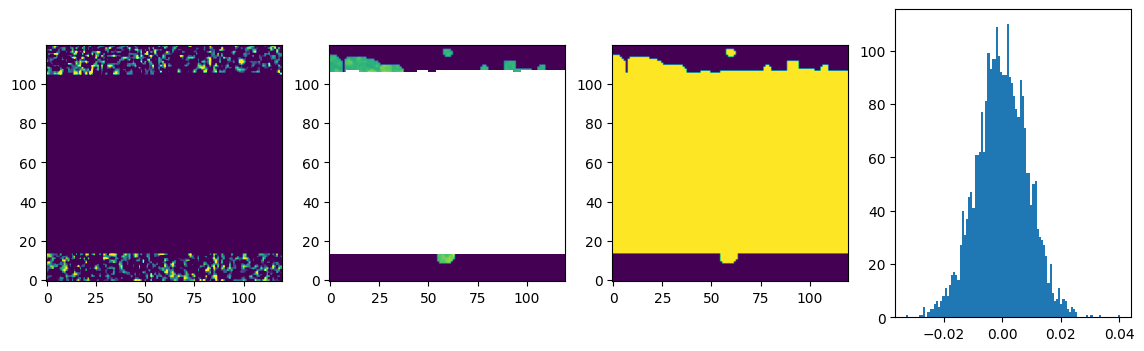

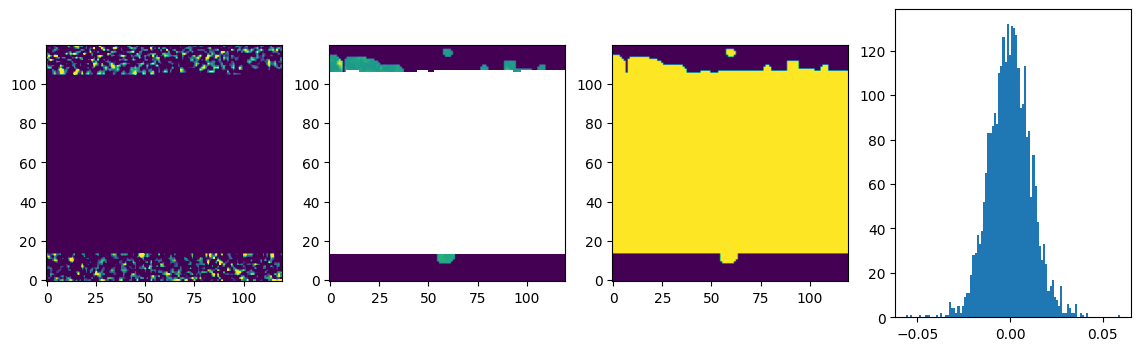

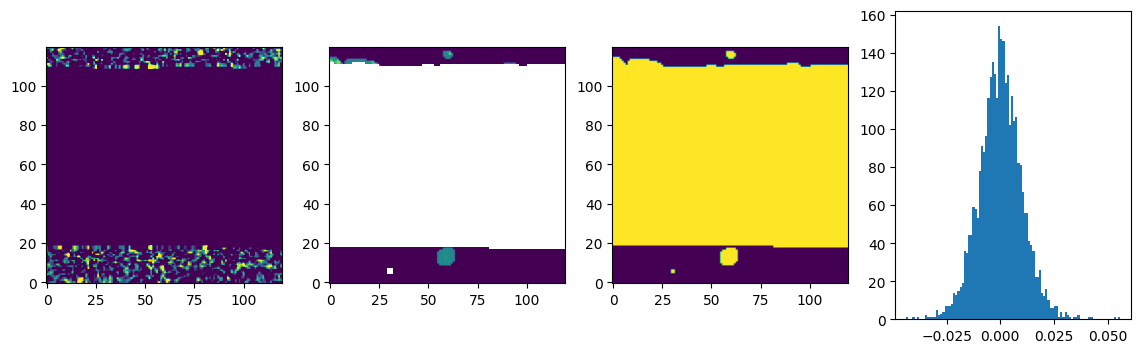

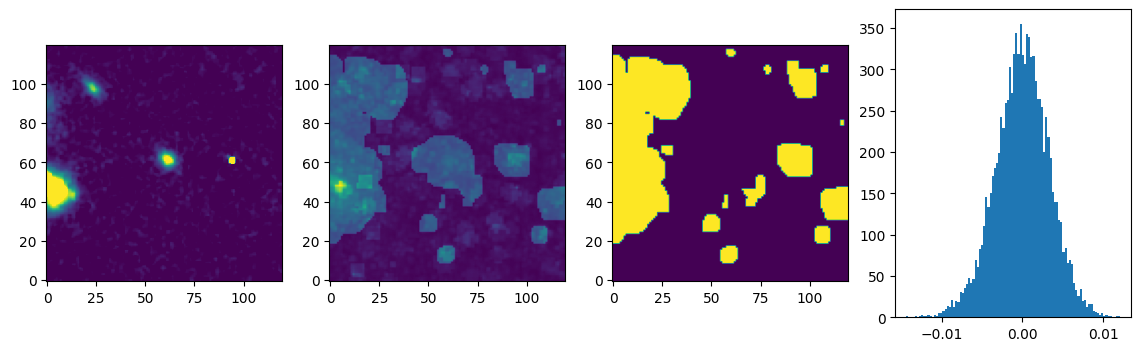

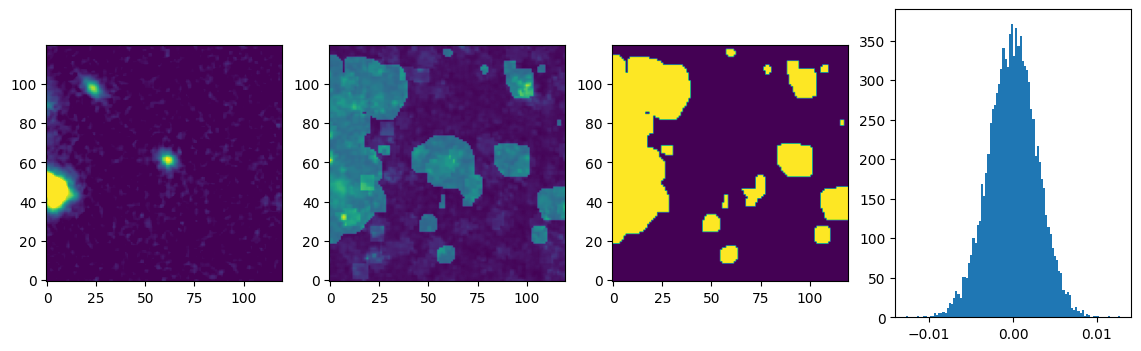

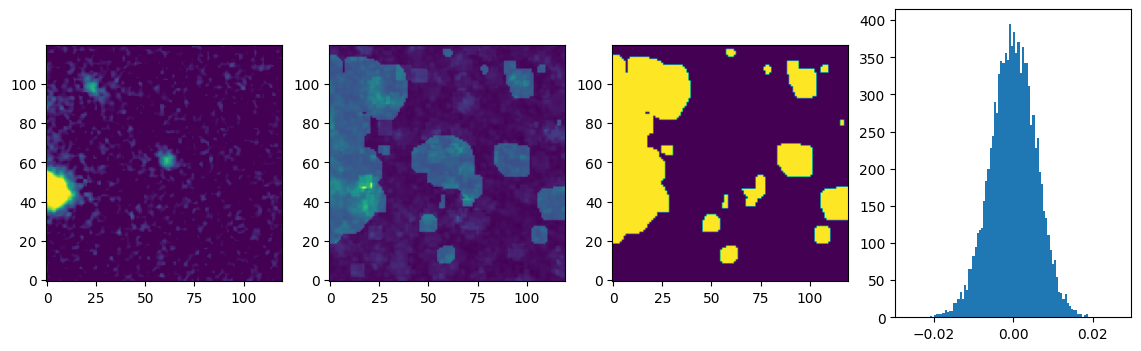

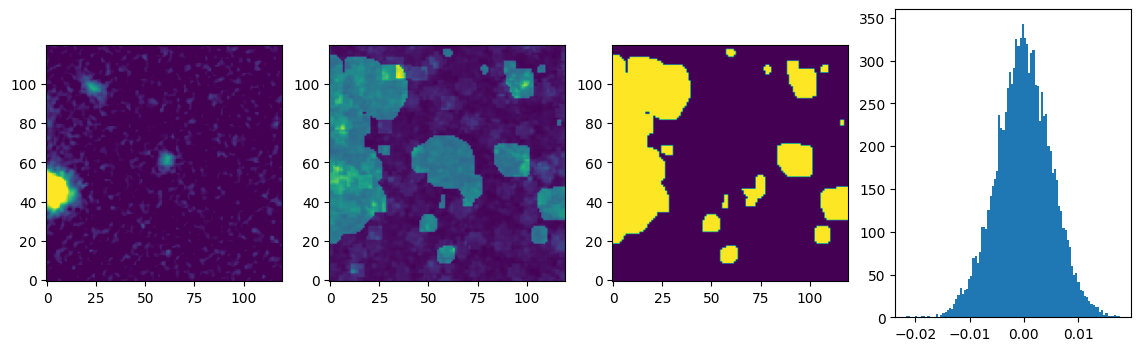

In [72]:
for img_path in img_path_list:
    with fits.open(img_path) as hdul:
        sci_cut = cutout(hdul['SCI_BKSUB'].data, x_c, y_c, size)
        err_cut = cutout(hdul['ERR'].data, x_c, y_c, size)
    scimap, errmap, bpmask, data1d = sc.gen_cutout(sci_cut, err_cut, hist=True)
    fig, ax = plt.subplots(1, 4, figsize=(14,4))

    ax[0].imshow(scimap, origin='lower', vmin=np.percentile(scimap, 60), vmax=np.percentile(scimap, 99))
    ax[1].imshow(errmap, origin='lower')
    ax[2].imshow(bpmask, origin='lower')
    ax[3].hist(data1d, bins=100)

In [73]:
band_list = ['F115W', 'F150W', 'F200W', 'F277W', 'F356W', 'F410M', 'F444W']
for img_path,band in zip(img_path_list,band_list):
    with fits.open(img_path) as hdul:
        sci_cut = cutout(hdul['SCI_BKSUB'].data, x_c, y_c, size)
        err_cut = cutout(hdul['ERR'].data, x_c, y_c, size)
    scimap, errmap, bpmask = sc.gen_cutout(sci_cut, err_cut)

    sci_path = sample_dir + 'sci_' + band + '.fits'
    hdr_sci = fits.Header()
    hdr_sci['EXTNAME'] = 'SCI_BKSUB'
    hdr_sci['xc'] = x_c
    hdr_sci['yc'] = y_c
    fits.writeto(sci_path, scimap, header=hdr_sci, overwrite=True)

    err_path = sample_dir + 'err_' + band + '.fits'
    hdr_err = fits.Header()
    hdr_err['EXTNAME'] = 'ERR'
    hdr_err['xc'] = x_c
    hdr_err['yc'] = y_c
    fits.writeto(err_path, errmap, header=hdr_err, overwrite=True)
                
    bpmask_path = sample_dir + 'bpmask_' + band + '.fits'
    hdr_bpmask = fits.Header()
    hdr_bpmask['EXTNAME'] = 'BPMASK'
    hdr_bpmask['xc'] = x_c
    hdr_bpmask['yc'] = y_c
    fits.writeto(bpmask_path, bpmask.astype(int), header=hdr_bpmask, overwrite=True)

scaling error map to level of background std:  0.008608579186007563
scaling factor:  0.0
scaling error map to level of background std:  0.010656362144670356
scaling factor:  0.0


/Users/apple/Desktop/GALFIT/GalfitModified/utils/segmentcut.py:120: RuntimeWarning: invalid value encountered in multiply
  err_scaled = np.choose(self.mask_all, [err_cut*scale_factor, err_cut])
/Users/apple/Desktop/GALFIT/GalfitModified/utils/segmentcut.py:120: RuntimeWarning: invalid value encountered in multiply
  err_scaled = np.choose(self.mask_all, [err_cut*scale_factor, err_cut])


scaling error map to level of background std:  0.009488778573064844
scaling factor:  0.0
scaling error map to level of background std:  0.00323751088106522
scaling factor:  0.559348820565498
scaling error map to level of background std:  0.0028517745685411014
scaling factor:  0.5438404326154286
scaling error map to level of background std:  0.005583751000687691
scaling factor:  0.5784850496442185


/Users/apple/Desktop/GALFIT/GalfitModified/utils/segmentcut.py:120: RuntimeWarning: invalid value encountered in multiply
  err_scaled = np.choose(self.mask_all, [err_cut*scale_factor, err_cut])


scaling error map to level of background std:  0.0049995871536172
scaling factor:  0.5347924464080325


check

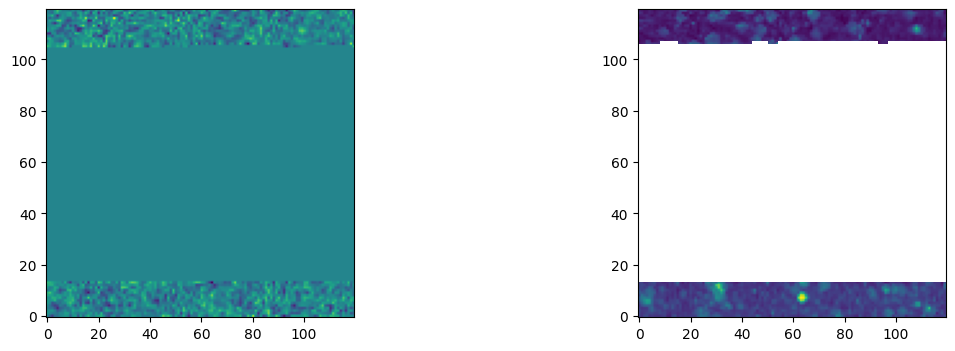

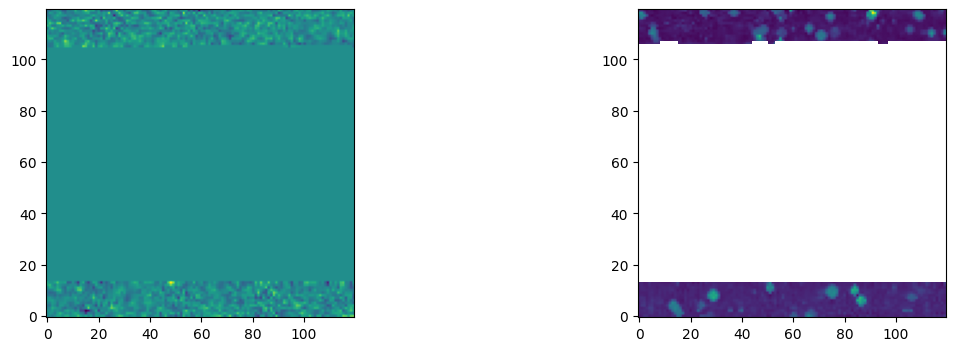

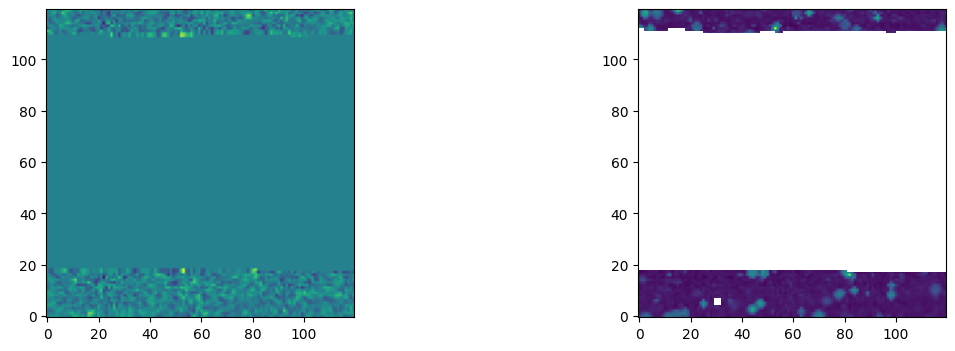

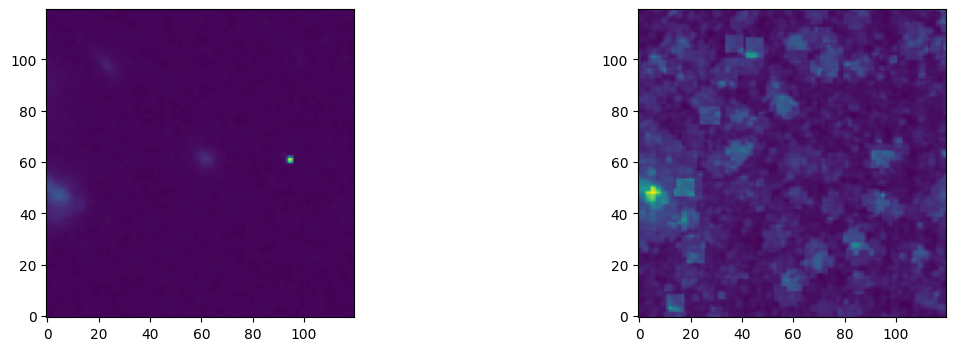

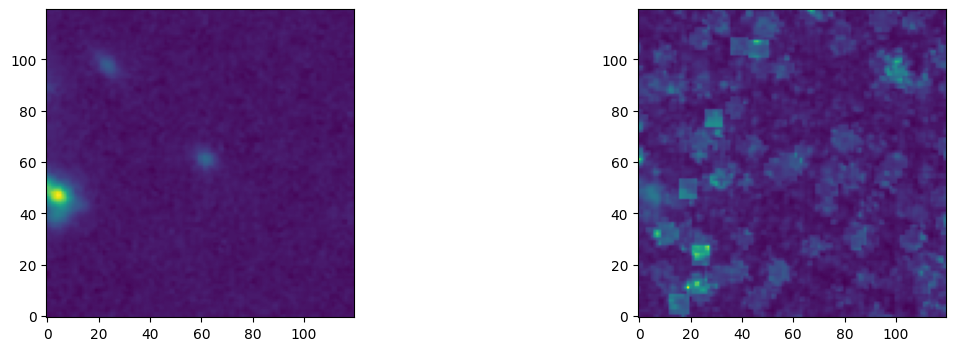

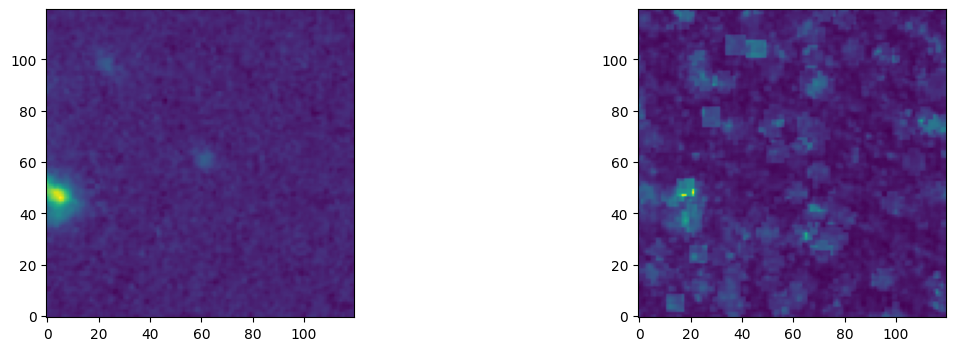

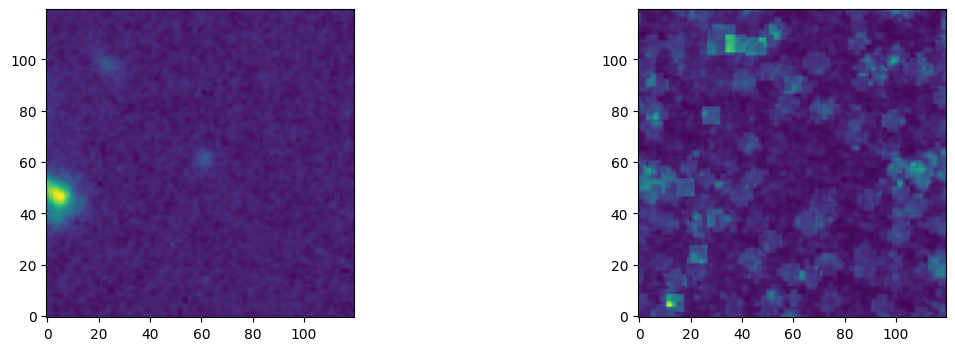

In [74]:
for img_path in img_path_list:
    with fits.open(img_path) as hdul:
        sci_cut = cutout(hdul['SCI_BKSUB'].data, x_c, y_c, size)
        err_cut = cutout(hdul['ERR'].data, x_c, y_c, size)
    fig, ax = plt.subplots(1, 2, figsize=(14,4))

    ax[0].imshow(sci_cut, origin='lower',)# vmin=np.percentile(sci_cut, 60), vmax=np.percentile(sci_cut, 99))
    ax[1].imshow(err_cut, origin='lower')